# Clasificador Bayesiano Ingenuo
## Imports y leer datos

In [1]:
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm

In [2]:
df = pd.read_csv("naive_bayes_work.csv")
df

,class,value
0,1,-5.180943
1,1,-9.520174
2,1,11.033474
3,1,10.724485
4,1,-7.219328
...,...,...
995,1,5.457831
996,1,7.731341
997,1,-12.204829
998,1,7.052644


## Probabilidades A Priori

In [3]:
prior_1 = (df[df['class'] == 1].count()/len(df))["class"]
prior_2 = (df[df['class'] == 2].count()/len(df))["class"]
prior_3 = (df[df['class'] == 3].count()/len(df))["class"]

print(f'P(1) = {prior_1}')
print(f'P(2) = {prior_2}')
print(f'P(3) = {prior_3}')

P(1) = 0.8
P(2) = 0.1
P(3) = 0.1


| Clase | Probalidad a Priori |
|-------|---------------------|
|     1 |                 80% |
|     2 |                 10% |
|     3 |                 10% |

## Parametros de las clases

In [4]:
means = df.groupby(['class']).mean()
std_devs = df.groupby(['class']).std()

stat_df = pd.merge(means, std_devs, on="class", how="left").rename(columns={"value_x": "mean", "value_y": "std_dev"})
stat_df

,mean,std_dev
class,,
1,2.175300,5.008352
2,0.922726,5.495858
3,2.514129,4.895177


| Clase | Media    | Desviacion Estandar |
|-------|----------|---------------------|
|     1 | 2.175300 |            5.008352 |
|     2 | 0.922726 |            5.495858 |
|     3 | 2.514129 |            4.895177 |

<AxesSubplot: ylabel='Density'>

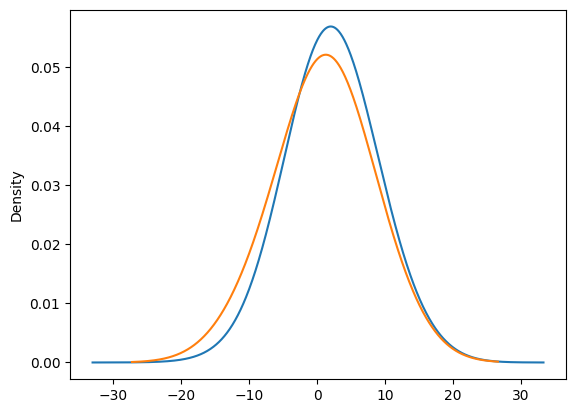

In [6]:
df1_t = df[df["class"] == 1].value.T
df1_t.plot.kde(bw_method=1)

df2_t = df[df["class"] == 2].value.T
df2_t.plot.kde(bw_method=1)

df3_t = df[df["class"] == 3].value.T
df3_t.plot.kde(bw_method=1)